<a href="https://colab.research.google.com/github/MaxCojocari/Py_labs/blob/main/forecasting_covid_de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://towardsdatascience.com/a-lightgbm-autoregressor-using-sktime-6402726e0e7b

* https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb

* https://www.sktime.org/en/stable/

* https://towardsdatascience.com/why-start-using-sktime-for-forecasting-8d6881c0a518


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install sktime[all_extras]

     |████████████████████████████████| 6.5 MB 3.7 MB/s 
     |████████████████████████████████| 3.3 MB 50.5 MB/s 
     |████████████████████████████████| 9.8 MB 51.5 MB/s 
     |████████████████████████████████| 6.9 MB 52.6 MB/s 
     |████████████████████████████████| 114 kB 87.0 MB/s 
     |████████████████████████████████| 65 kB 5.2 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 786 kB 59.9 MB/s 
     |████████████████████████████████| 11.2 MB 47.8 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 1.4 MB 35.2 MB/s 
     |████████████████████████████████| 580 kB 64.2 MB/s 
     |████████████████████████████████| 97 kB 7.8 MB/s 
     |████████████████████████████████| 119 kB 62.2 MB/s 
     |████████████████████████████████| 208 kB 35.0 MB/s 
     |██████

In [3]:
pip install matplotlib==3.1.1

     |████████████████████████████████| 13.1 MB 4.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
import numpy as np
import pandas as pd
from sktime.utils.plotting import plot_series

In [78]:
y = pd.read_csv('/content/drive/MyDrive/PBL_sem2/cases_covid_de.csv',
                index_col=0, squeeze=True, dtype={1: float})

# make sure time index is properly formatted

y.index = pd.PeriodIndex(y.index, freq='D')
y.name = "Number of cases"


(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc8436fed10>)

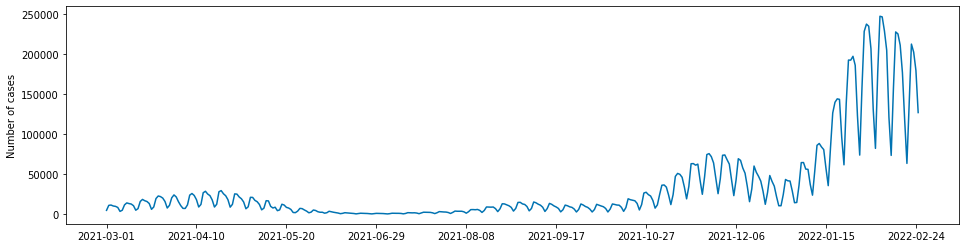

In [6]:
plot_series(y, markers=[''])

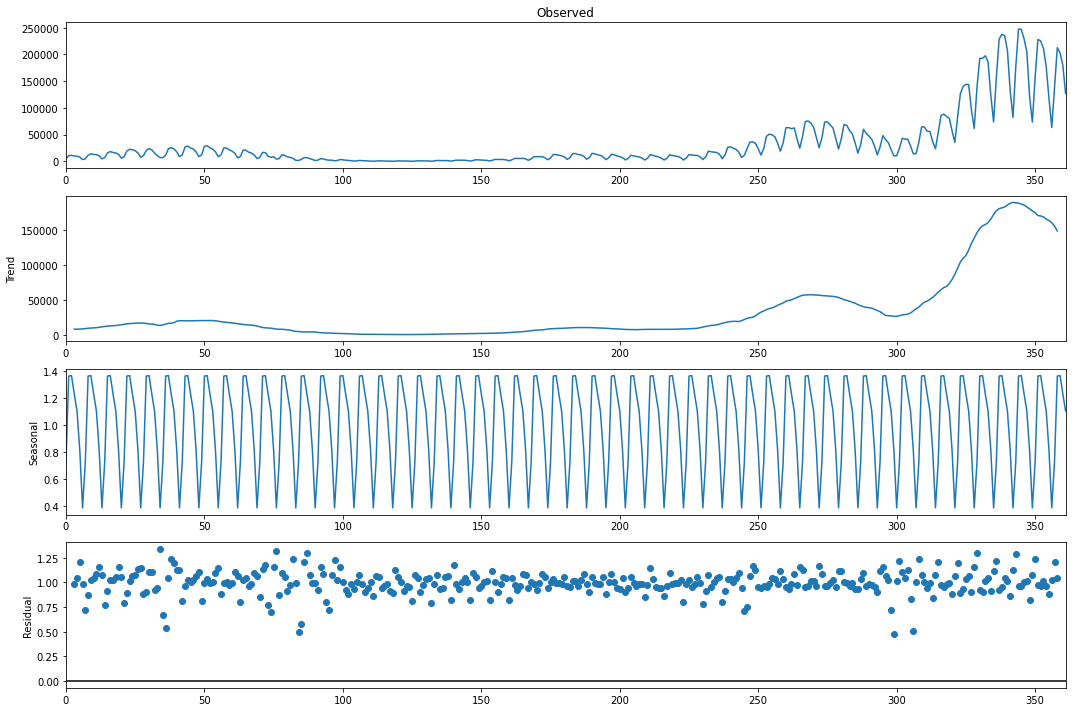

In [7]:
#Time series decomposition

# import necessary Python packages
import statsmodels.api as sm
import warnings
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
warnings.filterwarnings("ignore")

decomposition = sm.tsa.seasonal_decompose(y.values, model = 'multiplicable', period=7)
matplotlib.rcParams['figure.figsize'] = [15.0, 10.0]
fig = decomposition.plot()

In [8]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2021-01", periods=14, freq="D")), is_relative=False
)
fh

ForecastingHorizon(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
             '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
             '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
             '2021-01-13', '2021-01-14'],
            dtype='period[D]', is_relative=False)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc832fe3c90>)

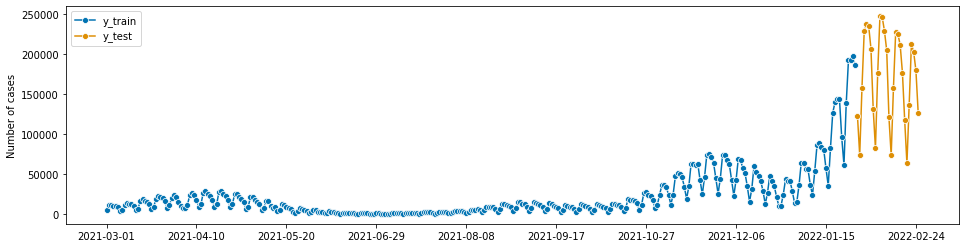

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=28)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [10]:
print(y_train.shape[0], y_test.shape[0])

334 28


In [11]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [12]:
#NaiveForecaster
from sktime.forecasting.naive import NaiveForecaster

# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=7)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc832e8e550>)

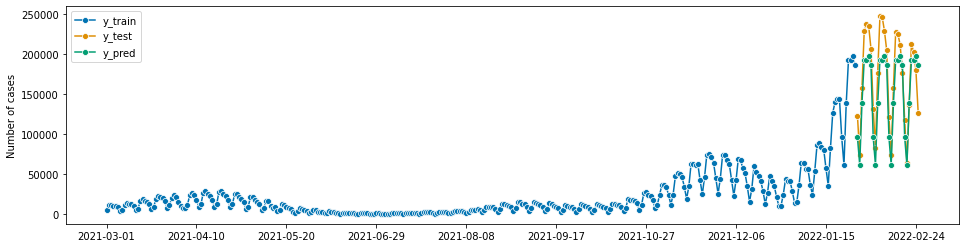

In [13]:
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [14]:
mean_absolute_percentage_error(y_test, y_pred)

0.1656417789294083

In [79]:
#Setting the data for test and train
y_train, y_test = temporal_train_test_split(y, test_size=14)

#Setting the forecasting horizon
fh = ForecastingHorizon(y_test.index, is_relative=False)

0.18362118176021003

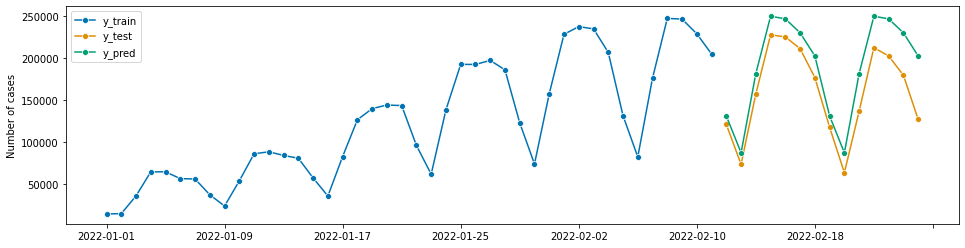

In [99]:
#exponential smoothing algorithm

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend=None, seasonal="Additive", sp=7)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.17595895810207457

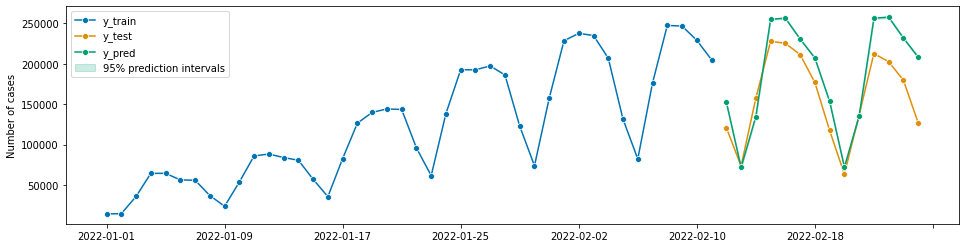

In [96]:
#ThetaForecaster
from sktime.forecasting.theta import ThetaForecaster
forecaster = ThetaForecaster(sp=7)

forecaster.fit(y_train)

# setting return_pred_int argument to True; alpha determines percentiles
# intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile
alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)[1]
y_pred = (y_pred_ints['upper'] + y_pred_ints['lower'])/2

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [97]:
#lower and upper bounds for ThetaForecaster
y_pred_ints

,lower,upper
2022-02-12,152091.327493,153267.003066
2022-02-13,71126.162898,72433.833641
2022-02-14,134107.309716,135534.822410
2022-02-15,254464.783249,256002.828181
2022-02-16,255721.191330,257362.340906
2022-02-17,229910.000774,231648.149689
2022-02-18,206320.679234,208150.693270
2022-02-19,152488.570893,154406.053902
2022-02-20,71140.306452,73141.438834
2022-02-21,134457.681959,136539.104676


0.18772032903433436

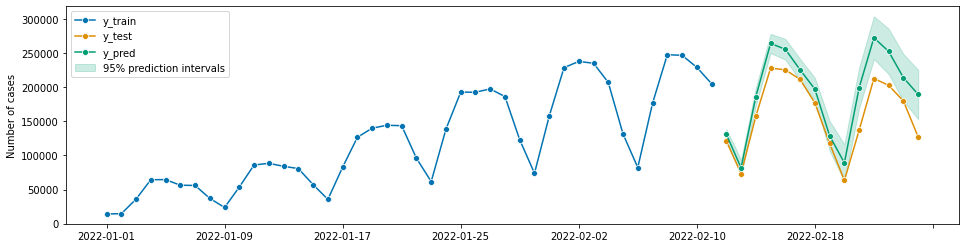

In [19]:
#AutoARIMA
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7, suppress_warnings=True)

forecaster.fit(y_train)

alpha = 0.05 
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [20]:
y_pred_ints #for AutoARIMA

,lower,upper
2022-02-12,123271.437379,138672.983023
2022-02-13,70026.086335,93509.698069
2022-02-14,173265.541319,199247.647570
2022-02-15,250119.324934,278210.579722
2022-02-16,240304.470771,270732.868544
2022-02-17,209528.663087,241411.318355
2022-02-18,180534.025520,213799.628003
2022-02-19,106945.622225,150532.563775
2022-02-20,61946.788190,116153.993827
2022-02-21,169613.268475,228908.028502


In [21]:
# to obtain the fitted parameters, run
forecaster.get_fitted_params()

{'aic': 6574.951668191845,
 'aicc': 6575.620361200963,
 'ar.L1': 0.9046369013271444,
 'ar.L2': -1.2833265706781742,
 'ar.L3': 0.3717034966820343,
 'ar.L4': -0.5153251286851741,
 'ar.S.L14': 0.1422596595613875,
 'ar.S.L7': -0.006462587406692113,
 'bic': 6613.241124367947,
 'hqic': 6590.208390779723,
 'ma.L1': -0.7536011263810256,
 'ma.L2': 0.7174751696115479,
 'ma.L3': 0.18199044469336487,
 'order': (4, 1, 3),
 'seasonal_order': (2, 1, 0, 7),
 'sigma2': 15437338.996798292}

0.1877743959523598

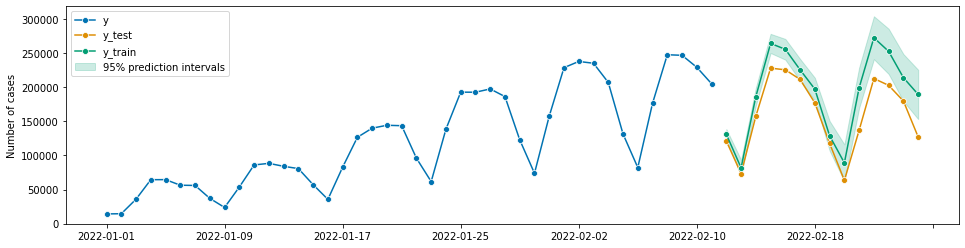

In [22]:
#ARIMA
from sktime.forecasting.arima import ARIMA
forecaster = ARIMA(
    order=(4, 1, 3), seasonal_order=(2, 1, 0, 7), suppress_warnings=True
)

forecaster.fit(y_train)

# setting return_pred_int argument to True; alpha determines percentiles
# intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile
alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y", "y_test", "y_train"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [23]:
y_pred_ints #for ARIMA

,lower,upper
2022-02-12,123271.880534,138673.424166
2022-02-13,70026.905047,93510.651213
2022-02-14,173266.382814,199249.348915
2022-02-15,250120.746756,278213.541788
2022-02-16,240310.582893,270740.567786
2022-02-17,209538.927799,241423.485604
2022-02-18,180542.873460,213811.089652
2022-02-19,106951.134641,150541.149403
2022-02-20,61952.676022,116162.527187
2022-02-21,169622.583096,228920.842820


In [24]:
#BATS and TBATS
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
forecaster_BATS = BATS(sp=7, use_trend=True, use_box_cox=False)
forecaster_TBATS = TBATS(sp=7, use_trend=True, use_box_cox=False)

forecaster_BATS.fit(y_train)
forecaster_TBATS.fit(y_train)

TBATS(sp=7, use_box_cox=False, use_trend=True)

0.23167190032271187

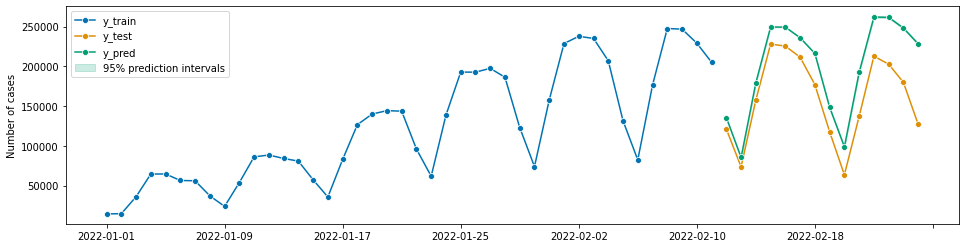

In [25]:
alpha = 0.05 
y_pred, y_pred_ints = forecaster_BATS.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [26]:
y_pred_ints #for BATS

,lower,upper
2022-02-12,135219.975924,135743.804006
2022-02-13,84884.554168,85639.718956
2022-02-14,178799.718177,179603.708712
2022-02-15,249046.212321,249893.432722
2022-02-16,248889.883070,249786.921089
2022-02-17,235469.522518,236438.070999
2022-02-18,215626.245802,216701.304009
2022-02-19,147660.940280,149113.943359
2022-02-20,97767.171503,99473.132720
2022-02-21,191429.715016,193221.858382


0.239479743183721

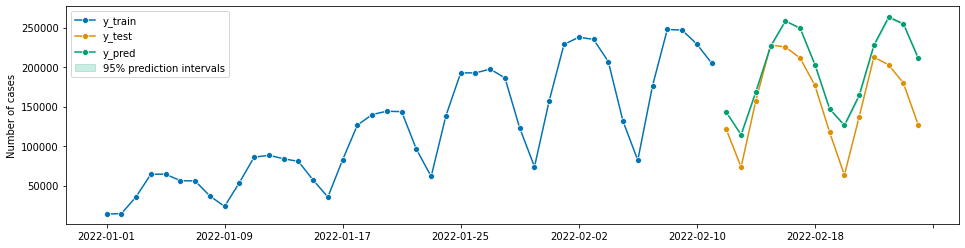

In [27]:
alpha = 0.05 
y_pred, y_pred_ints = forecaster_TBATS.predict(fh, return_pred_int=True, alpha=alpha)

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

mean_absolute_percentage_error(y_pred, y_test)

In [28]:
y_pred_ints #for TBATS

,lower,upper
2022-02-12,142388.669413,143187.345366
2022-02-13,113917.346172,114883.007436
2022-02-14,168302.351429,169268.396552
2022-02-15,225777.168063,226801.183714
2022-02-16,257840.810088,258883.214371
2022-02-17,248589.023445,249704.573262
2022-02-18,202544.241786,203892.313195
2022-02-19,146313.857914,147928.449734
2022-02-20,125442.860668,127257.441288
2022-02-21,163151.659633,165096.934058


In [29]:
#Facebook Prophet
from sktime.forecasting.fbprophet import Prophet

In [30]:
#The current interface does not support period indices, only pd.DatetimeIndex.
#Consider improving this by contributing the sktime.

#Convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq="D")
z_train, z_test = temporal_train_test_split(z, test_size=14)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.10952320147220548

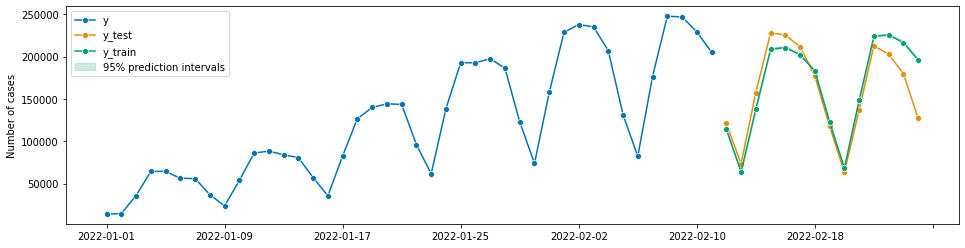

In [31]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 7),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False
)

forecaster.fit(z_train)

alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred, y_pred_ints = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]), return_pred_int=True, alpha=alpha)
y_pred.index = y_test.index


fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y", "y_test", "y_train"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

#downloading plot
from google.colab import files
plt.savefig('Prophet.png')
files.download('Prophet.png')

mean_absolute_percentage_error(y_pred, y_test)

In [32]:
y_pred_ints #for Prophet

,lower,upper
2022-02-12,112889.194265,115047.354537
2022-02-13,63084.106030,65552.917003
2022-02-14,136832.918916,138773.833141
2022-02-15,207877.766690,210115.651572
2022-02-16,210402.874947,212705.715350
2022-02-17,202568.639675,204540.715775
2022-02-18,182560.573848,184771.003801
2022-02-19,121448.284632,123392.190703
2022-02-20,66924.328149,68824.090552
2022-02-21,147176.990776,148994.777272


0.10946115282838198

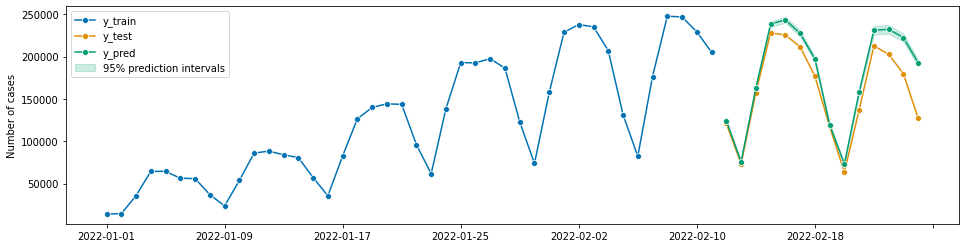

In [93]:
#ETS
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=7, n_jobs=-1)

forecaster.fit(y_train)
alpha = 0.05 
y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)[1]

y_pred = (y_pred_ints['upper'] + y_pred_ints['lower'])/2

fig, ax = plot_series(y_train['2022-01-01':], y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{round(100*(1 - alpha))}% prediction intervals",
)
ax.legend();

# #downloading plot
# from google.colab import files
# plt.savefig('AutoETS.svg')
# files.download('AutoETS.svg')

mean_absolute_percentage_error(y_pred, y_test)

In [91]:
y_pred_ints

,lower,upper
2022-02-12,123633.167911,125955.566495
2022-02-13,74780.279630,76464.027188
2022-02-14,160695.270588,165031.091822
2022-02-15,234039.397891,241963.760333
2022-02-16,237876.318097,244210.130016
2022-02-17,225126.747704,230996.807009
2022-02-18,195560.080230,202473.396277
2022-02-19,118118.113565,122606.534623
2022-02-20,71588.421695,74552.491779
2022-02-21,154242.331370,161509.299535


In [87]:
y_pred

2022-02-12    124023.804162
2022-02-13     76394.550624
2022-02-14    165224.178557
2022-02-15    242277.268951
2022-02-16    247113.754586
2022-02-17    233968.980036
2022-02-18    204378.505427
2022-02-19    124023.804162
2022-02-20     76394.550624
2022-02-21    165224.178557
2022-02-22    242277.268951
2022-02-23    247113.754586
2022-02-24    233968.980036
2022-02-25    204378.505427
Freq: D, dtype: float64

In [35]:
# advanced evaluation worfklow: rolling re-sampling and aggregate errors, rolling back-testing
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter

In [36]:
error_data = []
headers = []

In [37]:
forecaster = ExponentialSmoothing(trend=None, seasonal="Additive", sp=7)
cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("ExponentialSmoothing")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.104001,0.019683,0.003905,278,2021-12-03
1,0.121236,0.013752,0.003554,285,2021-12-10
2,0.274811,0.016172,0.003716,292,2021-12-17
3,0.533107,0.014503,0.003377,299,2021-12-24
4,0.340196,0.014328,0.003979,306,2021-12-31
5,0.232619,0.014719,0.005490,313,2022-01-07
6,0.299020,0.017981,0.005023,320,2022-01-14
7,0.235845,0.017306,0.003416,327,2022-01-21
8,0.144257,0.013802,0.003614,334,2022-01-28
9,0.056939,0.015515,0.004240,341,2022-02-04


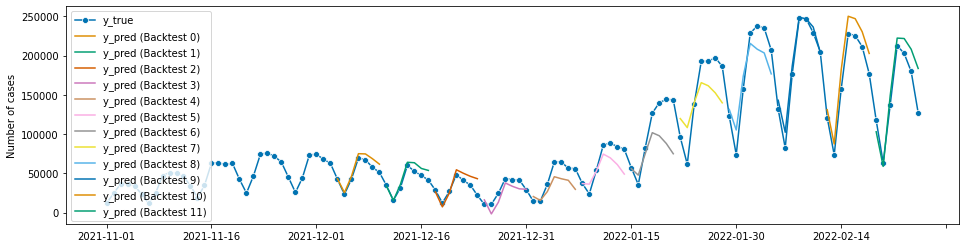

In [38]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [39]:
forecaster = ThetaForecaster(sp=7)
cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("ThetaForecaster")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.131443,0.136372,0.005971,278,2021-12-03
1,0.142403,0.022681,0.006052,285,2021-12-10
2,0.219954,0.022800,0.005928,292,2021-12-17
3,0.338812,0.023412,0.005891,299,2021-12-24
4,0.490825,0.023512,0.005805,306,2021-12-31
5,0.268617,0.024007,0.005706,313,2022-01-07
6,0.339477,0.025199,0.005827,320,2022-01-14
7,0.196603,0.023898,0.006106,327,2022-01-21
8,0.121554,0.024696,0.005979,334,2022-01-28
9,0.093549,0.025902,0.005892,341,2022-02-04


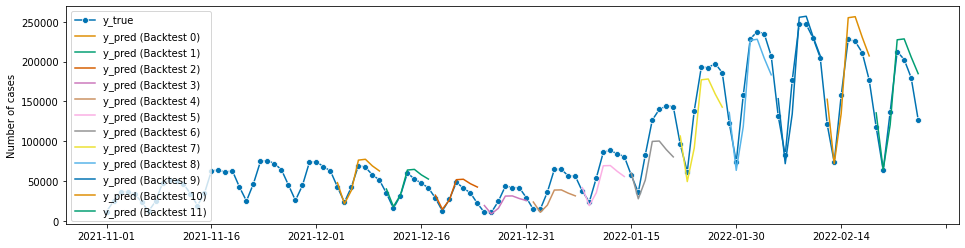

In [40]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [41]:
forecaster = ARIMA(
    order=(2, 1, 0), seasonal_order=(2, 1, 0, 7), suppress_warnings=True
)

cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("ARIMA")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.079987,0.371992,0.010466,278,2021-12-03
1,0.050462,0.400222,0.009974,285,2021-12-10
2,0.283157,0.379795,0.010099,292,2021-12-17
3,0.882818,0.378743,0.009869,299,2021-12-24
4,0.274866,0.441932,0.009741,306,2021-12-31
5,0.133398,0.403742,0.011164,313,2022-01-07
6,0.194340,0.437885,0.010175,320,2022-01-14
7,0.126196,0.389592,0.023763,327,2022-01-21
8,0.124315,0.474107,0.009806,334,2022-01-28
9,0.062315,0.517122,0.010515,341,2022-02-04


In [42]:
error_data

[0     0.104001
 1     0.121236
 2     0.274811
 3     0.533107
 4     0.340196
 5     0.232619
 6     0.299020
 7     0.235845
 8     0.144257
 9     0.056939
 10    0.114288
 11    0.133669
 Name: test_MeanAbsolutePercentageError, dtype: float64, 0     0.131443
 1     0.142403
 2     0.219954
 3     0.338812
 4     0.490825
 5     0.268617
 6     0.339477
 7     0.196603
 8     0.121554
 9     0.093549
 10    0.127972
 11    0.138724
 Name: test_MeanAbsolutePercentageError, dtype: float64, 0     0.079987
 1     0.050462
 2     0.283157
 3     0.882818
 4     0.274866
 5     0.133398
 6     0.194340
 7     0.126196
 8     0.124315
 9     0.062315
 10    0.067470
 11    0.164978
 Name: test_MeanAbsolutePercentageError, dtype: float64]

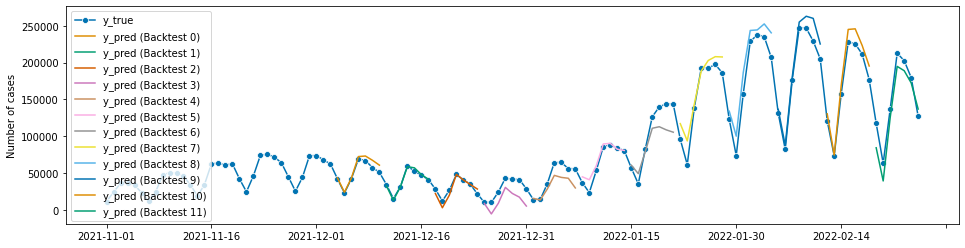

In [43]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [44]:
forecaster = AutoETS(auto=True, n_jobs=-1, sp=7)
cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("AutoETS")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.100166,0.883011,0.004810,278,2021-12-03
1,0.118529,0.876404,0.003832,285,2021-12-10
2,0.182569,1.049826,0.004268,292,2021-12-17
3,0.333728,0.902668,0.003683,299,2021-12-24
4,0.310025,0.911731,0.003676,306,2021-12-31
5,0.164097,0.802145,0.003741,313,2022-01-07
6,0.260722,0.984869,0.003925,320,2022-01-14
7,0.144457,0.939763,0.003726,327,2022-01-21
8,0.072842,0.993092,0.003903,334,2022-01-28
9,0.038325,0.965775,0.004961,341,2022-02-04


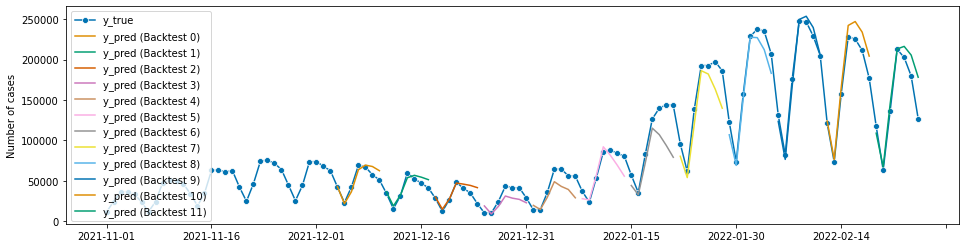

In [45]:
fig, ax = plot_series(
    y['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)
ax.legend();

In [46]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 7),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
)

cv = ExpandingWindowSplitter(
    step_length=7, fh=[1, 2, 3, 4, 5, 6, 7], initial_window=int(len(y))-7*12
)

z = y.copy()
z = z.to_timestamp(freq="D")

df = evaluate(forecaster=forecaster, y=z, cv=cv, strategy="refit", return_data=True)
error_data.append(df.iloc[:, 0])
headers.append("Prophet")
df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.185691,0.280735,1.804835,278,2021-12-03
1,0.464240,0.331451,1.637676,285,2021-12-10
2,0.645468,0.257946,1.657726,292,2021-12-17
3,0.657083,0.205002,1.882545,299,2021-12-24
4,0.228810,0.191842,1.583055,306,2021-12-31
5,0.239395,0.182945,1.494109,313,2022-01-07
6,0.524857,0.281677,1.610002,320,2022-01-14
7,0.712217,0.192112,1.579549,327,2022-01-21
8,0.622324,0.175734,1.540863,334,2022-01-28
9,0.391603,0.139525,1.707316,341,2022-02-04


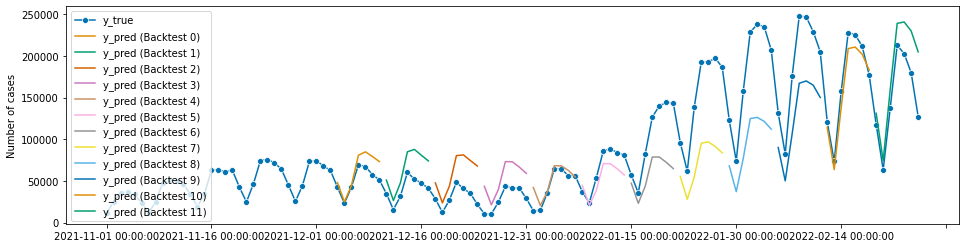

In [47]:
z = y.copy()
z = z.to_timestamp(freq="D")
fig, ax = plot_series(
    z['2021-11-01':],
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    df["y_pred"].iloc[6],
    df["y_pred"].iloc[7],
    df["y_pred"].iloc[8],
    df["y_pred"].iloc[9],
    df["y_pred"].iloc[10],
    df["y_pred"].iloc[11],
    markers=["o"]+[""]*12,
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(12)],
)

ax.legend();


# #downloading plot
# from google.colab import files
# plt.savefig('fig.png')
# files.download('fig.png')

In [48]:
dfx = df.copy()
dfx['cutoff']

0    2021-12-03
1    2021-12-10
2    2021-12-17
3    2021-12-24
4    2021-12-31
5    2022-01-07
6    2022-01-14
7    2022-01-21
8    2022-01-28
9    2022-02-04
10   2022-02-11
11   2022-02-18
Name: cutoff, dtype: datetime64[ns]

In [49]:
df3 = pd.concat(error_data, axis=1, keys=headers)

In [50]:
df3

,ExponentialSmoothing,ThetaForecaster,ARIMA,AutoETS,Prophet
0,0.104001,0.131443,0.079987,0.100166,0.185691
1,0.121236,0.142403,0.050462,0.118529,0.464240
2,0.274811,0.219954,0.283157,0.182569,0.645468
3,0.533107,0.338812,0.882818,0.333728,0.657083
4,0.340196,0.490825,0.274866,0.310025,0.228810
5,0.232619,0.268617,0.133398,0.164097,0.239395
6,0.299020,0.339477,0.194340,0.260722,0.524857
7,0.235845,0.196603,0.126196,0.144457,0.712217
8,0.144257,0.121554,0.124315,0.072842,0.622324
9,0.056939,0.093549,0.062315,0.038325,0.391603


In [69]:
df4 = pd.concat([df3, dfx['cutoff']], axis=1)

In [70]:
df4

,ExponentialSmoothing,ThetaForecaster,ARIMA,AutoETS,Prophet,cutoff
0,0.104001,0.131443,0.079987,0.100166,0.185691,2021-12-03
1,0.121236,0.142403,0.050462,0.118529,0.464240,2021-12-10
2,0.274811,0.219954,0.283157,0.182569,0.645468,2021-12-17
3,0.533107,0.338812,0.882818,0.333728,0.657083,2021-12-24
4,0.340196,0.490825,0.274866,0.310025,0.228810,2021-12-31
5,0.232619,0.268617,0.133398,0.164097,0.239395,2022-01-07
6,0.299020,0.339477,0.194340,0.260722,0.524857,2022-01-14
7,0.235845,0.196603,0.126196,0.144457,0.712217,2022-01-21
8,0.144257,0.121554,0.124315,0.072842,0.622324,2022-01-28
9,0.056939,0.093549,0.062315,0.038325,0.391603,2022-02-04


In [71]:
df4.set_index(['cutoff'])

,ExponentialSmoothing,ThetaForecaster,ARIMA,AutoETS,Prophet
cutoff,,,,,
2021-12-03,0.104001,0.131443,0.079987,0.100166,0.185691
2021-12-10,0.121236,0.142403,0.050462,0.118529,0.464240
2021-12-17,0.274811,0.219954,0.283157,0.182569,0.645468
2021-12-24,0.533107,0.338812,0.882818,0.333728,0.657083
2021-12-31,0.340196,0.490825,0.274866,0.310025,0.228810
2022-01-07,0.232619,0.268617,0.133398,0.164097,0.239395
2022-01-14,0.299020,0.339477,0.194340,0.260722,0.524857
2022-01-21,0.235845,0.196603,0.126196,0.144457,0.712217
2022-01-28,0.144257,0.121554,0.124315,0.072842,0.622324


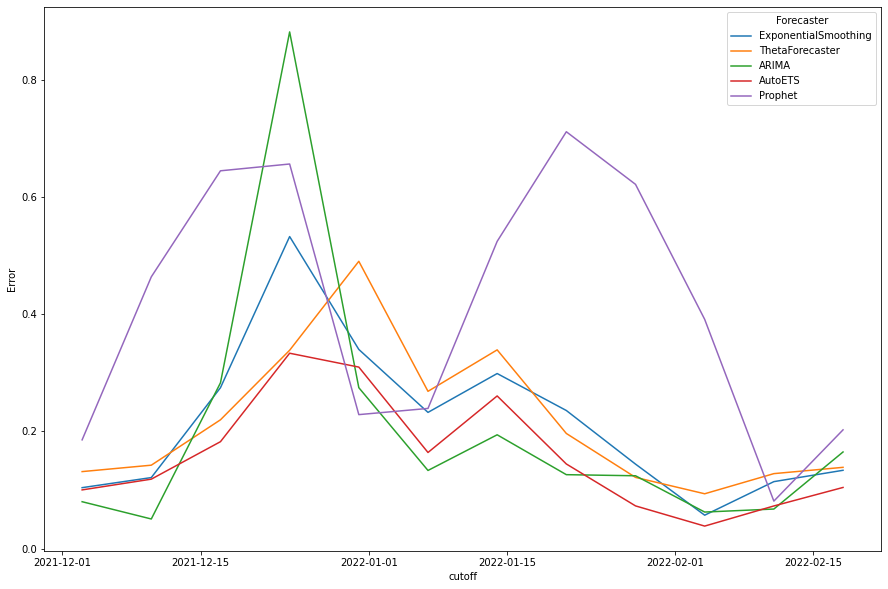

In [95]:
import seaborn as sns
# sns.lineplot(x='cutoff', y='value', hue='variable', 
#              data=pd.melt(df4, ['cutoff']))

df4 = pd.melt(df4, 'cutoff', var_name='Forecaster', 
              value_name='Error')

sns.lineplot('cutoff', 'Error', hue='Forecaster', 
             data=df4)

How we can observe from plot above, the forecaster with the lowest error trend in backtest cases is AutoETS. Therefore, we will use it as main forecaster for further deploying process.